### Junção dos dados

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
targets = pd.read_csv('dados tratados/v1/targets.csv')

In [4]:
features = pd.read_excel('dados tratados/v1/rotas_sintese.xlsx',sheet_name='Todos')

In [5]:
df = pd.merge(features,targets,on='Amostra')

In [6]:
# df.to_csv('dados tratados/v1/data.csv',index=False)

In [7]:
df = df.drop(['Mau', 'Maa', 'Mag'], axis=1)

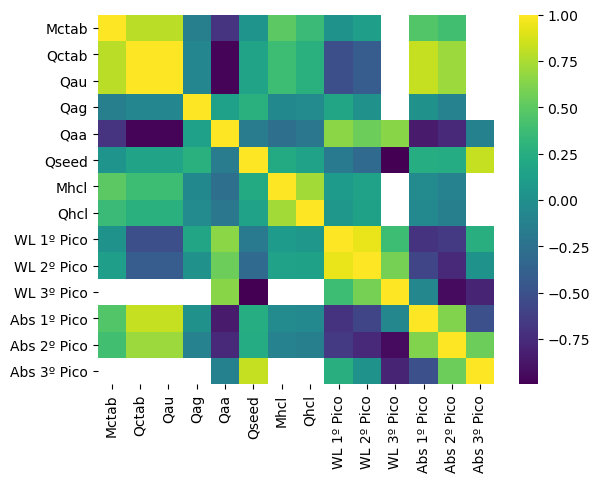

In [8]:
ax = sns.heatmap(df.iloc[:,1:].corr(),cmap='viridis')
plt.show()

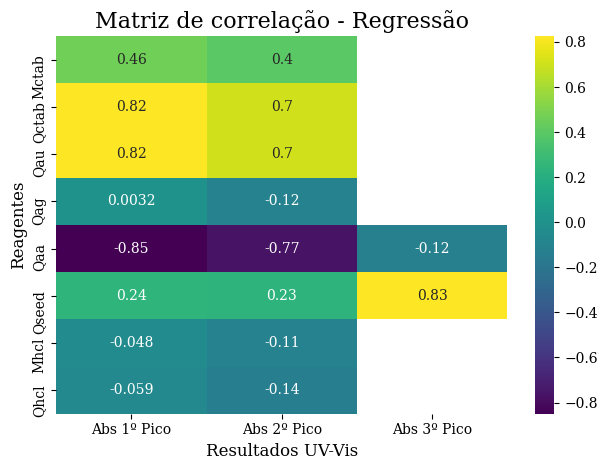

In [9]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

sns.heatmap(df.iloc[:,1:].corr().iloc[11:,:8].T,cmap='viridis',annot=True)
plt.title('Matriz de correlação - Regressão',fontsize=16)
plt.ylabel('Reagentes',fontsize=12)
plt.xlabel('Resultados UV-Vis',fontsize=12)
plt.tight_layout()

# plt.savefig('figs/corr_r.png')

plt.show()

#

In [10]:
df['Abs 1º Pico'] = df['Abs 1º Pico'].replace(np.nan,0)

In [11]:
df['Abs 2º Pico'] = df['Abs 2º Pico'].replace(np.nan,0)

In [12]:
df['Abs 3º Pico'] = df['Abs 3º Pico'].replace(np.nan,0)

In [13]:
res = [False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True]

In [14]:
df_novo = df.iloc[:,1:9]
df_novo['Resultado'] = res
classificacao = df_novo.corr().iloc[:-1,-1]

In [15]:
corr = df.iloc[:,1:].corr().iloc[11:,:8]

In [16]:
corr.loc[len(corr.index)] = classificacao

In [17]:
corr.index

Index(['Abs 1º Pico', 'Abs 2º Pico', 'Abs 3º Pico', 3], dtype='object')

In [18]:
corr = corr.rename(index={3: 'Classificação'})

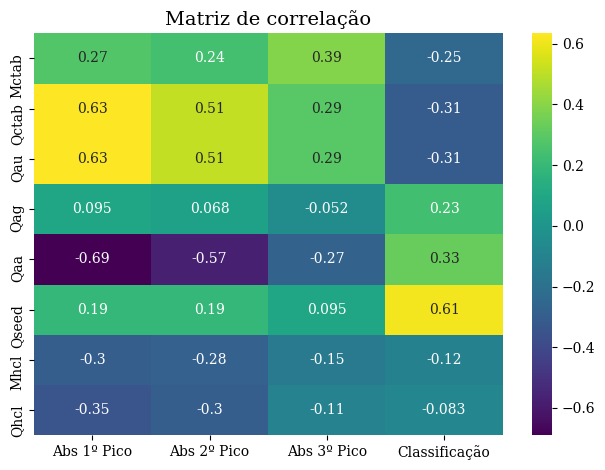

In [20]:
sns.heatmap(corr.T,cmap='viridis',annot=True)
plt.title('Matriz de correlação',fontsize=14)
# plt.ylabel('Reagentes',fontsize=12)
# plt.xlabel('Resultados UV-Vis',fontsize=12)
plt.tight_layout()

# plt.savefig('figs/corr.png')

plt.show()